### `5. Discretization`

**Definition:** Discretization is the process of transforming continuous variables into discrete variables by creating a set of contiguous intervals that spans the range of the variable's values.

#### **5.1. Why Discretize Matters**

- help to improve model performance by grouping of similar attributes with similar predictive strengths
- bring into non-linearity and thus improve fitting power of the model
- enhance interpretability with grouped values
- minimize the impact of extreme values/seldom reversal patterns
- prevent overfitting possible with numerical variables
- allow feature interaction between continuous variables

**Note:** Discretization helps handle outliers by placing these values into the lower or higher intervals, together with the remaining inlier values of the distribution. Thus, these outlier observations no longer differ from the rest of the values at the tails of the distribution, as they are now all together in the same interval or bucket. In addition, by creating appropriate bins or intervals, discretization can help spread the values of a skewed variable across a set of bins with an equal number of observations.

#### **5.2. How to Handle Discretization**

| **Method** | **Definition** |
| --- | --- |
| Equal width binning | divides the scope of possible values into N bins of the same width |
| Equal frequency binning | divides the scope of possible values of the variable into N bins, where each bin carries the same amount of observations |
| K-means binning | using k-means to partition values into clusters |

In general there's no best choice of discretization method. It really depends on the dataset and the following learning algorithm. Study carefully about your features and context before deciding. You can also try different methods and compare the model performance.

Some literature reviews on feature discretization can be found [here1](https://pdfs.semanticscholar.org/94c3/d92eccbb66f571153f99b7ae6c6167a00923.pdf) and [here2](http://robotics.stanford.edu/users/sahami/papers-dir/disc.pdf)

#### **5.3. Applying the Discretization**

In [40]:
import numpy as np  
import pandas as pd

import seaborn as sns 
import matplotlib.pyplot as plt  

import warnings 
warnings.filterwarnings('ignore')

In [41]:
tips = sns.load_dataset('tips')
tips.sample(5)

,total_bill,tip,sex,smoker,day,time,size
123,15.95,2.00,Male,No,Thur,Lunch,2
137,14.15,2.00,Female,No,Thur,Lunch,2
195,7.56,1.44,Male,No,Thur,Lunch,2
211,25.89,5.16,Male,Yes,Sat,Dinner,4
78,22.76,3.00,Male,No,Thur,Lunch,2


In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    tips[['total_bill']], # X
    tips[['tip']], # y
    test_size=.2,
    random_state=0
    )

X_train.shape, X_test.shape

((195, 1), (49, 1))

> Equal width discretization

Equal width discretization divides the scope of possible values into N bins of the same width. The width is determined by the range of values in the variable and the number of bins we wish to use to divide the variable:

$width = \frac {(max value - min value)}{N}$

where $N$ is the number of bins or intervals.

For example, if the values of the variable vary between 0 and 100, we create 5 bins like this: width = (100 - 0)/5 = 20. The bins thus are 0-20, 20-40, 40-60, 60-80, and 80-100. The first and final bins (0-20 and 80-100) can be expanded to accomodate outliers (that is, value under 0 or greater than 100 would be placed in those bins as well)

There is no rule of thumb to define N; that is something to determine experimentally.


In [43]:
X_train.describe()

,total_bill
count,195.000000
mean,20.199385
std,9.144904
min,3.070000
25%,13.275000
50%,18.040000
75%,24.570000
max,50.810000


In [44]:
from sklearn.preprocessing import KBinsDiscretizer

discreate = KBinsDiscretizer(n_bins=10, strategy='uniform',encode='ordinal')
discreate.fit(X_train)
discreate.bin_edges_

array([array([ 3.07 ,  7.844, 12.618, 17.392, 22.166, 26.94 , 31.714, 36.488,
              41.262, 46.036, 50.81 ])                                       ],
      dtype=object)

In [45]:
X_train_disc = pd.DataFrame(discreate.transform(X_train),columns=['total_bill'])
X_test_disc = pd.DataFrame(discreate.transform(X_test),columns=['total_bill'])

In [46]:
X_train

,total_bill
7,26.88
83,32.68
176,17.89
106,20.49
156,48.17
...,...
67,3.07
192,28.44
117,10.65
47,32.40


In [47]:
X_train_disc

,total_bill
0,4.0
1,6.0
2,3.0
3,3.0
4,9.0
...,...
190,0.0
191,5.0
192,1.0
193,6.0


In [48]:
temp = pd.concat([
    X_train_disc.value_counts(normalize=True).sort_index(),
    X_test_disc.value_counts(normalize=True).sort_index()
],axis=1)

temp.columns = ['train','test']

In [49]:
temp

,train,test
total_bill,,
0.0,0.025641,0.040816
1.0,0.179487,0.142857
2.0,0.251282,0.387755
3.0,0.210256,0.204082
4.0,0.133333,0.102041
5.0,0.076923,0.081633
6.0,0.056410,0.020408
7.0,0.035897,NaN
8.0,0.015385,NaN


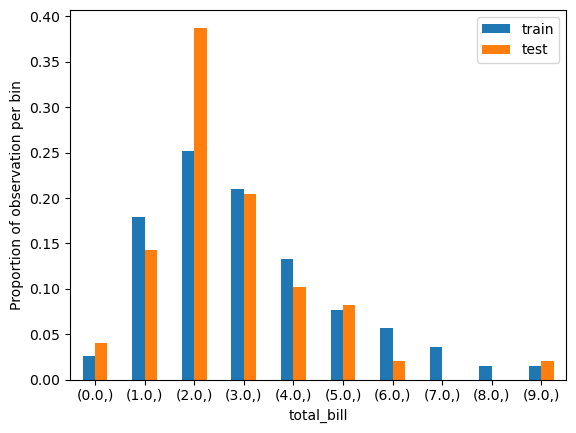

In [50]:
temp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Proportion of observation per bin')
plt.show()

> Equal frequency discretization

Equal frequency discretization divides the scope of possible values of the variables into N bins, where each bins carries the same amount of observations. This is particularly useful for skewed variables, as it spreads the observations over the different bins equally. We find the interval boundaries by determining the quantiles.

Equal frequency discretization using quantiles consist of dividing the continuous variable into N quantiles, where N to be defined by the user.

Equal frequency discretization is straightforward to implement and by spreading the values of the observations more evenly, it may help boost the algorithm's performance. This arbitrary binning may also disrupt the relationship with the target.


In [51]:
discreate = KBinsDiscretizer(n_bins=10, strategy='quantile',encode='ordinal')
discreate.fit(X_train)
discreate.bin_edges_



array([array([ 3.07 , 10.34 , 12.588, 14.344, 16.386, 18.04 , 20.466, 22.808,
              26.914, 32.872, 50.81 ])                                       ],
      dtype=object)

In [52]:
X_train_disc = pd.DataFrame(discreate.transform(X_train),columns=['total_bill'])
X_test_disc = pd.DataFrame(discreate.transform(X_test),columns=['total_bill'])

temp = pd.concat([
    X_train_disc.value_counts(normalize=True).sort_index(),
    X_test_disc.value_counts(normalize=True).sort_index()
],axis=1)

temp.columns = ['train','test']

In [53]:
X_train_disc.value_counts().sort_index()

total_bill
0.0           19
1.0           20
2.0           20
3.0           19
4.0           19
5.0           20
6.0           19
7.0           20
8.0           19
9.0           20
Name: count, dtype: int64

In [54]:
temp

,train,test
total_bill,,
0.0,0.097436,0.102041
1.0,0.102564,0.081633
2.0,0.102564,0.142857
3.0,0.097436,0.163265
4.0,0.097436,0.122449
5.0,0.102564,0.122449
6.0,0.097436,0.040816
7.0,0.102564,0.102041
8.0,0.097436,0.081633


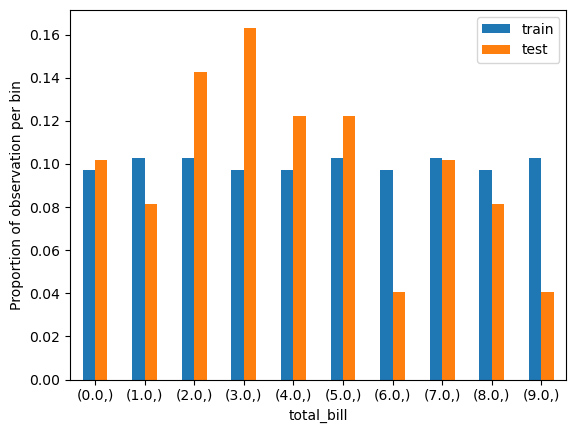

In [55]:
temp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Proportion of observation per bin')
plt.show()

> Discretization with k-means

This discretization method consists of applying k-means clustering to the continuous variable.

Briefly, the algorithm works as follows:
- Initialization: random creation of K centers. - Each data point is associated with the closest center. 
- Each center position is re-computed as the center of its associated points.
- Step 2 and step 3 are repeated until convergence is reached. The algorithm minimize the pairwise squared deviations of points within the same cluster.

More details about k-means are [here](https://en.wikipedia.org/wiki/K-means_clustering).

Note that the user needs to define the number of clusters.


In [56]:
discreate = KBinsDiscretizer(n_bins=10, strategy='kmeans',encode='ordinal')
discreate.fit(X_train)
discreate.bin_edges_

array([array([ 3.07      ,  9.34625   , 13.28101974, 17.25468045, 21.50574405,
              25.90689951, 30.78024887, 36.46659341, 41.85095238, 46.66833333,
              50.81      ])                                                   ],
      dtype=object)

In [57]:
X_train_disc = pd.DataFrame(discreate.transform(X_train),columns=['total_bill'])
X_test_disc = pd.DataFrame(discreate.transform(X_test),columns=['total_bill'])

temp = pd.concat([
    X_train_disc.value_counts(normalize=True).sort_index(),
    X_test_disc.value_counts(normalize=True).sort_index()
],axis=1)

temp.columns = ['train','test']

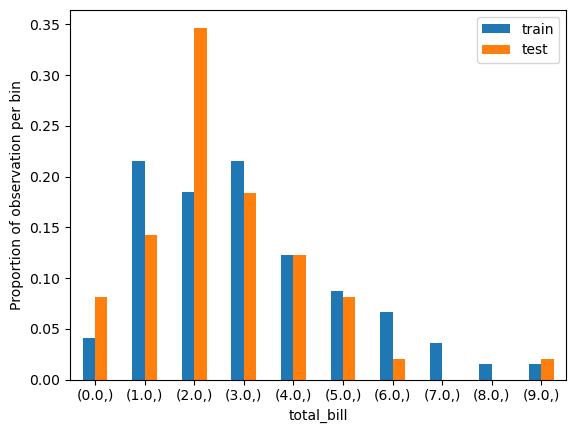

In [58]:
temp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Proportion of observation per bin')
plt.show()

___

### `6. Feature Creation`

**Definition:** Creating new features as a combination of existing ones. It's a great way to add domain knowledge to the dataset.

#### **6.1. Missing Data Derived Feature**

As mentioned in missing value section, we can create new binary feature denoting whether the observations have missing value on raw feature with value 0/1.

#### **6.2. Simple Statistical Derived Feature**

Creating new features by performing simple statistical calculations on the raw features, including:

- count/sum
- average/median/mode
- max/min/stddev/variance/range/IQR/Coefficient - of Variation
- time span/interval

Take call log for example, we can create new features like: number of calls, number of call-in/call-out, average calling duration, monthly average calling duration, max calling duration, etc.

#### **6.3. Feature Crossing**

After having some simple statistical derived features, we can have them crossed together. Common dimensions used for crossing include:

- time
- region
- business types

Still take call log for example, we can have crossed features like: number of calls during night times/day times, number of calls under different business types (banks/taxi services/travelling/hospitalities), number of calls during the past 3 months, etc. Many of the statistical calculations mentioned in section 6.2 can be used again to create more features.

#### **6.4. Ratios and Proportions**

Common techniques. For example, in order to predict future performance of credit card sales of a branch, ratios like credit card sales / sales person or credit card sales / marketing spend would be more powerful than just using absolute number of card sold in the branch.

#### **6.5. Cross Product between Categorical Features**

Consider a categorical feature A, with two possible values {A1, A2}. Let B be a feature with possibilities {B1, B2}. Then, a feature-cross between A & B would take one of the following values: {(A1, B1), (A1, B2), (A2, B1), (A2, B2)}. You can basically give these ‘combinations’ any names you like. Just remember that every combination denotes a synergy between the information contained by the corresponding values of A and B.

This is an extremely useful technique, when certain features together denote a property better than individually by themselves. Mathematically speaking, you are doing a cross product between all possible values of the categorical features.

#### **6.6. Polynomial Expansion**

The cross product can also be applied to numerical features, which results in a new interaction feature between A and B. This can be done easily be sklearn's [PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html#sklearn.preprocessing.PolynomialFeatures), which generate a new feature set consisting of all polynomial combinations of the features with degree less than or equal to the specified degree. For example, three raw features {X1, X2, X3} can generate a feature set of {1, X1X2, X1X3, X2X3, X1X2X3} with a degree of 2.

#### **6.7. Applying the Polynomial Expansion**

In [59]:
df = pd.DataFrame(np.linspace(0, 10, 11), columns=['var'])

df

,var
0,0.0
1,1.0
2,2.0
3,3.0
4,4.0
5,5.0
6,6.0
7,7.0
8,8.0
9,9.0


In [60]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3, include_bias=False)
poly.fit(df)

df_poly = pd.DataFrame(poly.transform(df), columns=poly.get_feature_names_out())
df_poly

,var,var^2,var^3
0,0.0,0.0,0.0
1,1.0,1.0,1.0
2,2.0,4.0,8.0
3,3.0,9.0,27.0
4,4.0,16.0,64.0
5,5.0,25.0,125.0
6,6.0,36.0,216.0
7,7.0,49.0,343.0
8,8.0,64.0,512.0
9,9.0,81.0,729.0


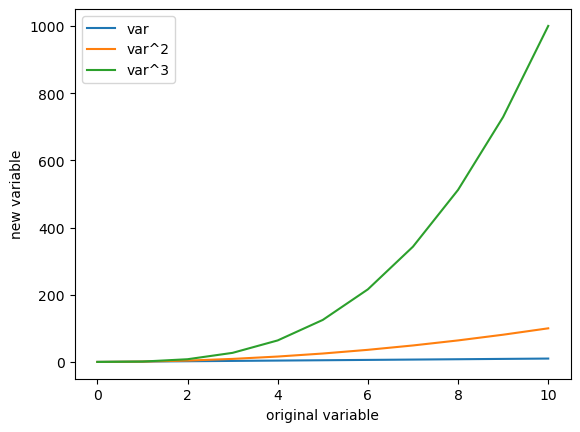

In [61]:
plt.plot(df['var'],df_poly)
plt.legend(df_poly.columns)
plt.xlabel('original variable')
plt.ylabel('new variable')
plt.show()

In [62]:
df = pd.DataFrame(
    {
        'x1':range(1,11),
        'x2':range(10,0,-1)
    }
)

df

,x1,x2
0,1,10
1,2,9
2,3,8
3,4,7
4,5,6
5,6,5
6,7,4
7,8,3
8,9,2
9,10,1


In [63]:
poly = PolynomialFeatures(degree=4, include_bias=False, interaction_only=False)
poly.fit(df)

df_poly = pd.DataFrame(poly.transform(df), columns=poly.get_feature_names_out())
df_poly

,x1,x2,x1^2,x1 x2,x2^2,x1^3,x1^2 x2,x1 x2^2,x2^3,x1^4,x1^3 x2,x1^2 x2^2,x1 x2^3,x2^4
0,1.0,10.0,1.0,10.0,100.0,1.0,10.0,100.0,1000.0,1.0,10.0,100.0,1000.0,10000.0
1,2.0,9.0,4.0,18.0,81.0,8.0,36.0,162.0,729.0,16.0,72.0,324.0,1458.0,6561.0
2,3.0,8.0,9.0,24.0,64.0,27.0,72.0,192.0,512.0,81.0,216.0,576.0,1536.0,4096.0
3,4.0,7.0,16.0,28.0,49.0,64.0,112.0,196.0,343.0,256.0,448.0,784.0,1372.0,2401.0
4,5.0,6.0,25.0,30.0,36.0,125.0,150.0,180.0,216.0,625.0,750.0,900.0,1080.0,1296.0
5,6.0,5.0,36.0,30.0,25.0,216.0,180.0,150.0,125.0,1296.0,1080.0,900.0,750.0,625.0
6,7.0,4.0,49.0,28.0,16.0,343.0,196.0,112.0,64.0,2401.0,1372.0,784.0,448.0,256.0
7,8.0,3.0,64.0,24.0,9.0,512.0,192.0,72.0,27.0,4096.0,1536.0,576.0,216.0,81.0
8,9.0,2.0,81.0,18.0,4.0,729.0,162.0,36.0,8.0,6561.0,1458.0,324.0,72.0,16.0
9,10.0,1.0,100.0,10.0,1.0,1000.0,100.0,10.0,1.0,10000.0,1000.0,100.0,10.0,1.0


___

### `7. Feature Transformation`

**Definition:** Transforming the data from one form to another form, keeping the essence of the data. In simple words, the transformers are the type of functions that are applied to data that is not normally distributed, and once applied there is a high of getting normally distributed data.

#### **7.1. Why Feature Transformation Matters**

**Regression**

Linear regression is a straightforward approach for predicting a quantitative response Y on the basis of a different predictor variable X1, X2, ... Xn. It assumes that there is a linear relationship between X(s) and Y. Mathematically, we can write this linear relationship as Y ≈ β0 + β1X1 + β2X2 + ... + βnXn.

**Classification**

Similarly, for classification, Logistic Regression assumes a linear relationship between the variables and the log of the odds.

Odds = p / (1 - p), where p is the probability of y = 1

log(odds) = β0 + β1X1 + β2X2 + ... + βnXn

**Why it's important to follow linear assumption**

If the machine learning model assumes a linear dependency between the predictors Xs and the outcome Y, when there is not such a linear relationship, the model will have a poor performance. In such cases, we are better off trying another machine learning model that does not make such assumption.

If there is no linear relationship and we have to use the linear/logistic regression models, mathematical transformation/discretization may help create the relationship, though it cannot guarantee a better result.

**Linear Regression Assumptions**

Linear Regression has the following assumptions over the predictor variables X:

- Linear relationship with the outcome Y
- Multivariate normality
- No or little multicollinearity
- Homoscedasticity

Normality assumption means that every variable X should follow a Gaussian distribution.

Homoscedasticity, also known as homogeneity of variance, describes a situation in which the error term (that is, the “noise” or random disturbance in the relationship between the independent variables (Xs) and the dependent variable (Y)) is the same across all values of the independent variables.

Violations in the assumptions of homoscedasticity and / or normality (assuming a distribution of data is homoscedastic or Gaussian, when in reality it is not) may result in poor model performance.

The remaining machine learning models, including Neural Networks, Support Vector Machines, Tree based methods and PCA do not make any assumption over the distribution of the independent variables. However, in many occasions the model performance may benefit from a "Gaussian-like" distribution.

Why may models benefit from a "Gaussian-like" distributions? In variables with a normal distribution, the observations of X available to predict Y vary across a greater range of values, that is, the values of X are "spread" over a greater range.

In the situations above, transformation of the original variable can help give the variable more of a bell-shape of the Gaussian distribution.


#### **7.2. How to Handle Feature Transformation**

| **Method** | **Definition** |
| --- | --- |
| Logarithmic transformation | $log(x+1)$. We use (x+1) instead of x to avoid value of 0 |
| Reciprocal transformation | $\frac{1}{x}$. Warning that x should not be 0. |
| Square root transformation | $\sqrt{x}$ |
| Exponential transformation | $x^m$ |
| Box-cox transformation | $\frac{x^λ-1}{λ}$ |
| Quantile transformation | transform features using quantiles information |

**Log transformation** is useful when applied to skewed distributions as they tend to expand the values which fall in the range of lower magnitudes and tend to compress or reduce the values which fall in the range of higher magnitudes, which helps to make the skewed distribution as normal-like as possible. Square root transformation does a similar thing in this sense.

**Box-Cox transformation** in sklearn is another popular function belonging to the power transform family of functions. This function has a pre-requisite that the numeric values to be transformed must be positive (similar to what log transform expects). In case they are negative, shifting using a constant value helps. Mathematically, the Box-Cox transform function can be denoted as follows.

\begin{equation*}
y = f(x,λ) = x^λ = \begin{cases}
\frac{x^λ-1}{λ} & \text{for }λ > 0 \\
log_e (x) & \text{for }λ = 0 \\
\end{cases}
\end{equation*}

**Quantile transformation** in sklearn transforms the features to follow a uniform or a normal distribution. Therefore, for a given feature, this transformation tends to spread out the most frequent values. It also reduces the impact of (marginal) outliers: this is therefore a robust preprocessing scheme. However, this transform is non-linear. It may distort linear correlations between variables measured at the same scale but renders variables measured at different scales more directly comparable.

We can use Q-Q plot to check if the variable is normally distributed (a 45 degree straight line of the values over the theoretical quantiles) after transformation.

#### **7.3. Applying the Feature Transformation**

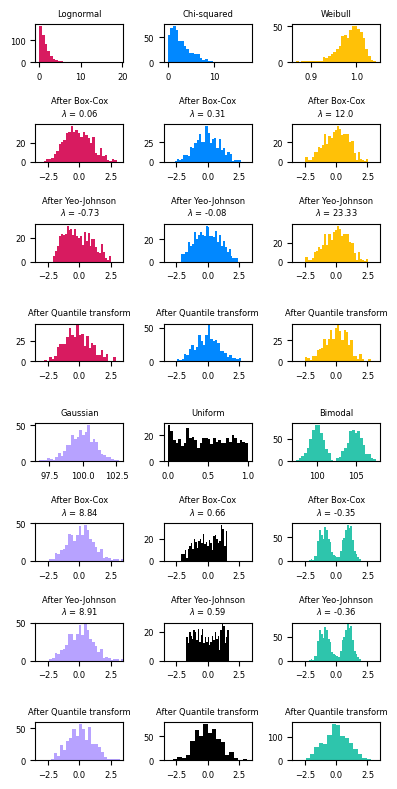

In [64]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer, QuantileTransformer

N_SAMPLES = 1000
FONT_SIZE = 6
BINS = 30


rng = np.random.RandomState(304)
bc = PowerTransformer(method="box-cox")
yj = PowerTransformer(method="yeo-johnson")
# n_quantiles is set to the training set size rather than the default value
# to avoid a warning being raised by this example
qt = QuantileTransformer(
    n_quantiles=500, output_distribution="normal", random_state=rng
)
size = (N_SAMPLES, 1)


# lognormal distribution
X_lognormal = rng.lognormal(size=size)

# chi-squared distribution
df = 3
X_chisq = rng.chisquare(df=df, size=size)

# weibull distribution
a = 50
X_weibull = rng.weibull(a=a, size=size)

# gaussian distribution
loc = 100
X_gaussian = rng.normal(loc=loc, size=size)

# uniform distribution
X_uniform = rng.uniform(low=0, high=1, size=size)

# bimodal distribution
loc_a, loc_b = 100, 105
X_a, X_b = rng.normal(loc=loc_a, size=size), rng.normal(loc=loc_b, size=size)
X_bimodal = np.concatenate([X_a, X_b], axis=0)


# create plots
distributions = [
    ("Lognormal", X_lognormal),
    ("Chi-squared", X_chisq),
    ("Weibull", X_weibull),
    ("Gaussian", X_gaussian),
    ("Uniform", X_uniform),
    ("Bimodal", X_bimodal),
]

colors = ["#D81B60", "#0188FF", "#FFC107", "#B7A2FF", "#000000", "#2EC5AC"]

fig, axes = plt.subplots(nrows=8, ncols=3, figsize=plt.figaspect(2))
axes = axes.flatten()
axes_idxs = [
    (0, 3, 6, 9),
    (1, 4, 7, 10),
    (2, 5, 8, 11),
    (12, 15, 18, 21),
    (13, 16, 19, 22),
    (14, 17, 20, 23),
]
axes_list = [(axes[i], axes[j], axes[k], axes[l]) for (i, j, k, l) in axes_idxs]


for distribution, color, axes in zip(distributions, colors, axes_list):
    name, X = distribution
    X_train, X_test = train_test_split(X, test_size=0.5)

    # perform power transforms and quantile transform
    X_trans_bc = bc.fit(X_train).transform(X_test)
    lmbda_bc = round(bc.lambdas_[0], 2)
    X_trans_yj = yj.fit(X_train).transform(X_test)
    lmbda_yj = round(yj.lambdas_[0], 2)
    X_trans_qt = qt.fit(X_train).transform(X_test)

    ax_original, ax_bc, ax_yj, ax_qt = axes

    ax_original.hist(X_train, color=color, bins=BINS)
    ax_original.set_title(name, fontsize=FONT_SIZE)
    ax_original.tick_params(axis="both", which="major", labelsize=FONT_SIZE)

    for ax, X_trans, meth_name, lmbda in zip(
        (ax_bc, ax_yj, ax_qt),
        (X_trans_bc, X_trans_yj, X_trans_qt),
        ("Box-Cox", "Yeo-Johnson", "Quantile transform"),
        (lmbda_bc, lmbda_yj, None),
    ):
        ax.hist(X_trans, color=color, bins=BINS)
        title = "After {}".format(meth_name)
        if lmbda is not None:
            title += "\n$\\lambda$ = {}".format(lmbda)
        ax.set_title(title, fontsize=FONT_SIZE)
        ax.tick_params(axis="both", which="major", labelsize=FONT_SIZE)
        ax.set_xlim([-3.5, 3.5])


plt.tight_layout()
plt.show()

### `Application`

#### **Binning**

`Load Dataset`



In [65]:
disc = pd.read_csv('../../csv/discretization.csv')
disc.sample(5)

,x,class
778,29,1
795,50,0
16,18,1
1214,46,0
192,66,1


In [66]:
disc.describe()

,x,class
count,1529.000000,1529.000000
mean,42.809026,0.518640
std,14.299211,0.499816
min,18.000000,0.000000
25%,31.000000,0.000000
50%,44.000000,1.000000
75%,55.000000,1.000000
max,67.000000,1.000000


In [67]:
disc['class'].value_counts()

class
1    793
0    736
Name: count, dtype: int64

`Data Splitting`

Bagi dataset menjadi train dan test set dengan komposisi 80:20.

In [68]:
X = disc[['x']]
y = disc['class']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,stratify=y,random_state=10)
X_train.shape, X_test.shape

((1223, 1), (306, 1))

In [69]:
y.value_counts(normalize=True)

class
1    0.51864
0    0.48136
Name: proportion, dtype: float64

`Data Preprocessing`

Selanjutnya kita akan melakukan preprocessing sebagai berikut:

In [70]:
from sklearn.compose import ColumnTransformer

preprocessor_1 = ColumnTransformer([
    ('discretize',KBinsDiscretizer(n_bins=7,strategy='uniform',encode='ordinal'),['x'])
],remainder='passthrough')

preprocessor_2 = ColumnTransformer([
    ('discretize',KBinsDiscretizer(n_bins=7,strategy='uniform',encode='onehot'),['x'])
],remainder='passthrough')



In [71]:
X_train_prep_1 = preprocessor_1.fit_transform(X_train)
X_test_prep_1 = preprocessor_1.transform(X_test)

X_train_prep_2 = preprocessor_2.fit_transform(X_train)
X_test_prep_2 = preprocessor_2.transform(X_test)

In [72]:
X_train_prep_1

array([[2.],
       [0.],
       [0.],
       ...,
       [1.],
       [2.],
       [1.]])

### `Modeling`

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

score = []
for train,test in zip([X_train,X_train_prep_1,X_train_prep_2],[X_test,X_test_prep_1,X_test_prep_2]):
    logreg = LogisticRegression()
    logreg.fit(train,y_train)

    y_pred = logreg.predict(test)

    score.append(accuracy_score(y_test,y_pred))

In [74]:
score

[0.5163398692810458, 0.5, 0.7418300653594772]

In [75]:
pd.DataFrame({
    'param' : ['None','ordinal','onehot'],
    'accuracy' : score
})

,param,accuracy
0,None,0.51634
1,ordinal,0.50000
2,onehot,0.74183


Mari kita cek mengapa performa onehot lebih baik pada dataset ini dibandingkan menggunakan ordinal

In [76]:
df = X_train.copy()
df['y'] = y_train
df['bin'] = pd.qcut(df['x'],q=7)
df


,x,y,bin
1167,38,1,"(33.0, 40.0]"
16,18,1,"(17.999, 25.0]"
128,24,1,"(17.999, 25.0]"
372,64,1,"(60.0, 67.0]"
1050,50,1,"(47.0, 54.0]"
...,...,...,...
353,37,0,"(33.0, 40.0]"
394,60,1,"(54.0, 60.0]"
232,25,1,"(17.999, 25.0]"
134,36,1,"(33.0, 40.0]"


AttributeError: 'numpy.int64' object has no attribute 'startswith'

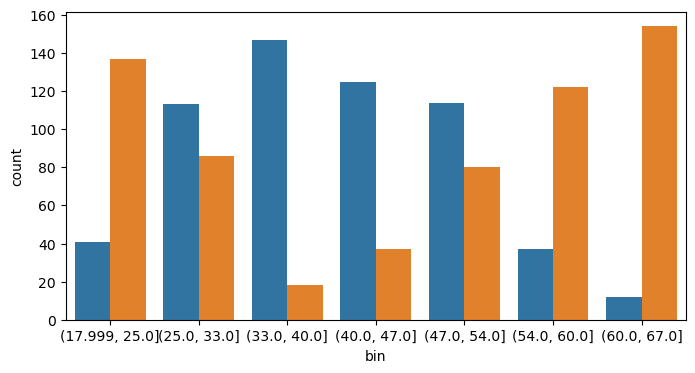

In [77]:
plt.figure(figsize=(8,4))
sns.countplot(data=df,x='bin',hue='y')
plt.legend()
plt.show()

Terlihat bahwa proporsi kelas 1 cenderung turun dari kelompok 1 hingga 3, kemudian berangsur naik dari kelompok 4 hingga 7, sehingga hubungannya cenderung tidak linear.

Oleh karena itu tidak cocok jika encodingnya menggunakan menggunakan ordinal. Machine learning bisa menangkap pola lebih baik ketika menggunakan onehot untuk encodingnya pada dataset yang telah dibinning.

#### **Polynomial Features**

`Load Dataset`


In [39]:
wine = pd.read_csv('../../csv/white_wine.csv')[['alcohol','density','quality']]
wine.sample(5)

,alcohol,density,quality
152,9.4,0.9940,6.0
476,12.4,0.9943,7.0
338,10.4,0.9945,5.0
144,11.2,0.9921,6.0
481,10.6,0.9917,6.0


`Data Cleaning`

**Duplicated Value**, Deteksi dan kuantifikasi duplikasi data

In [ ]:
wine.duplicated().sum()
print(f'Persentase Data Duplicate : {wine.duplicated().sum()/len(wine)*100:.2f}')

Persentase Data Duplicate : 22.12


Sebesar 22.12% data terindikasi duplikat, maka hilangkan salah satunya.

Handling duplikasi data:

In [ ]:
wine.drop_duplicates(keep='first',inplace=True,ignore_index=True)


In [ ]:
wine

,alcohol,density,quality
0,8.8,1.0010,6.0
1,9.5,0.9940,6.0
2,10.1,0.9951,6.0
3,9.9,0.9956,6.0
4,9.6,0.9949,6.0
...,...,...,...
400,10.3,1.0002,7.0
401,10.4,0.9926,6.0
402,10.4,0.9920,6.0
403,10.8,0.9918,6.0


**Missing Value**, Deteksi dan kuantifikasi missing value

In [ ]:
wine.isna().sum()

alcohol    1
density    0
quality    1
dtype: int64

Terdapat missing value pada kolom alcohol dan quality. Kita akan drop saja missing value tersebut.

In [ ]:
wine.dropna(inplace=True)

**Change Target**, Mengubah target menjadi kategorikal biner.

In [ ]:
wine['quality'] = np.where(wine['quality']>6,1,0)

In [ ]:
wine

,alcohol,density,quality
0,8.8,1.0010,0
1,9.5,0.9940,0
2,10.1,0.9951,0
3,9.9,0.9956,0
4,9.6,0.9949,0
...,...,...,...
399,11.2,0.9915,0
400,10.3,1.0002,1
401,10.4,0.9926,0
402,10.4,0.9920,0


`Data Splitting`

Bagi dataset menjadi train dan test set dengan komposisi 80:20.

In [218]:
X = wine[['density','alcohol']]
y = wine['quality']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=10,stratify=y)

display(y.value_counts(normalize=True),y_test.value_counts(normalize=True),y_train.value_counts(normalize=True))

quality
0    0.816832
1    0.183168
Name: proportion, dtype: float64

quality
0    0.814815
1    0.185185
Name: proportion, dtype: float64

quality
0    0.817337
1    0.182663
Name: proportion, dtype: float64

`Data Preprocessing`

Selanjutnya kita akan melakukan preprocessing sebagai berikut:

In [219]:
preprocessor_1 = ColumnTransformer([
    ('polynomial',PolynomialFeatures(degree=2),['alcohol','density'])
],remainder='passthrough')

preprocessor_2 = ColumnTransformer([
    ('polynomial',PolynomialFeatures(degree=3),['alcohol','density'])
],remainder='passthrough')

In [220]:
X_train_prep_1 = preprocessor_1.fit_transform(X_train)
X_test_prep_1 = preprocessor_1.transform(X_test)

X_train_prep_2 = preprocessor_2.fit_transform(X_train)
X_test_prep_2 = preprocessor_2.transform(X_test)


### `Modeling`

In [221]:
scored = []

for train,test in zip([X_train,X_train_prep_1,X_train_prep_2],[X_test,X_test_prep_1,X_test_prep_2]):
    logreg = LogisticRegression()
    logreg.fit(train, y_train)
    y_pred = logreg.predict(test)
    scored.append(accuracy_score(y_test,y_pred))

scored

[0.8765432098765432, 0.8888888888888888, 0.9753086419753086]

In [223]:
pd.DataFrame({
    'param' : ['None','Degree 2','Degree 3'],
    'accuracy' : scored
})

,param,accuracy
0,None,0.876543
1,Degree 2,0.888889
2,Degree 3,0.975309
